# National Survey on Drug Use and Health Analysis

The main purpose of the National Survey on Drug Use and Health (NSDUH) is to assess the prevalence of drug use in the United States. You can access the data through this link:https://www.icpsr.umich.edu/web/NAHDAP/studies/34933/publications.

For this exploratory data analysis, our focus will be on examining correlations related to overall patterns of drug abuse. Specifically, we will investigate the following relationships:

Transition from cigarette use to marijuana use.
Marijuana as a potential gateway drug.
Prescription painkiller use leading to heroin use.
The age at which drug use begins as an indicator of subsequent drug use.
It's important to note that the data used in this study primarily relies on self-reported information. Therefore, we should consider this aspect while conducting our evaluation.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# correlation helper
def visualize_data(df, rows=None):
    df_corr = df.corr()
    print(df_corr.head(10))

    data = df_corr.values
    
    if rows is not None:
        data = data[rows].reshape(len(rows), data.shape[1])
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)

    ax.set_xticks(np.arange(data.shape[0]), minor=False)
    ax.set_yticks(np.arange(data.shape[1]), minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    plt.xticks(rotation=90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()

In [3]:
# Load the data
data = pd.read_csv('34933-0001-Data.tsv', sep='\t', header=0)
print(data.shape)
print(data.head())
# check for missing values
print(data[np.isinf(data.values).any(axis=1)])
print(data[np.isnan(data.values).any(axis=1)])

(55268, 3120)
   CASEID  QUESTID2  CIGEVER  CIGOFRSM  CIGWILYR  CIGTRY  CIGYFU  CIGMFU  \
0       1  50886467        2         4         4     991    9991      91   
1       2  13766883        2        99        99     991    9991      91   
2       3  17772877        2        99        99     991    9991      91   
3       4  45622817        1        99        99      13    9999      99   
4       5  17239390        1        99        99      11    9999      99   

   CIGREC  CIG30USE  ...  IIEMPSTY  II2EMSTY  EMPSTAT4  IIEMPST4  II2EMST4  \
0      91        91  ...         1         1        99         9         9   
1      91        91  ...         1         1         1         1         1   
2      91        91  ...         1         1         1         1         1   
3       2        93  ...         1         1         2         1         1   
4       4        93  ...         1         1         1         1         1   

   PDEN00  COUTYP2      ANALWT_C  VESTR  VEREP  
0       2  

## Cigarette Use Transitioning To Marijuana Use
Relationship between Cigarette Use and Marijuana Use
In this analysis, we will examine the connection between marijuana and cigarette usage. We will utilize four variables obtained from the NSDUH study to investigate this relationship. These variables include:

CIGEVER: Indicates whether cigarettes have ever been used.

1 = Yes
0 = No
CIGREC: Indicates the time since the last instance of smoking cigarettes.

1 = Within the past 30 days
0 = Other durations*
MJEVER: Indicates whether marijuana or hashish has ever been used.

1 = Yes
0 = No
MJREC: Indicates the time since the last use of marijuana or hashish.

1 = Within the past 30 days
0 = Other durations*
For the variables CIGREC and MJREC, the "within the past 30 days" value suggests that the individual is likely a chronic user of the respective drug, rather than someone who tried it only once. To facilitate our analysis, we will convert each of these variables into binary values, where 0 represents having never used the drug, and 1 represents having used it.

*Note: Any duration other than "within the past 30 days" is considered indicative of non-chronic usage.

In [4]:
data_selection = data[["CIGEVER", "CIGREC", "MJEVER", "MJREC"]]

data_selection.loc[data_selection['CIGREC'] != 1, 'CIGREC'] = 0
data_selection.loc[data_selection['MJREC'] != 1, 'MJREC'] = 0

data_selection.loc[data_selection['CIGEVER'] != 1, 'CIGEVER'] = 0
data_selection.loc[data_selection['MJEVER'] != 1, 'MJEVER'] = 0

print(data_selection.head())

   CIGEVER  CIGREC  MJEVER  MJREC
0        0       0       0      0
1        0       0       0      0
2        0       0       0      0
3        1       0       1      1
4        1       0       0      0


We then analyze the correlation coefficients between these four variables.

          CIGEVER    CIGREC    MJEVER     MJREC
CIGEVER  1.000000  0.536949  0.557197  0.253175
CIGREC   0.536949  1.000000  0.399840  0.309268
MJEVER   0.557197  0.399840  1.000000  0.422643
MJREC    0.253175  0.309268  0.422643  1.000000


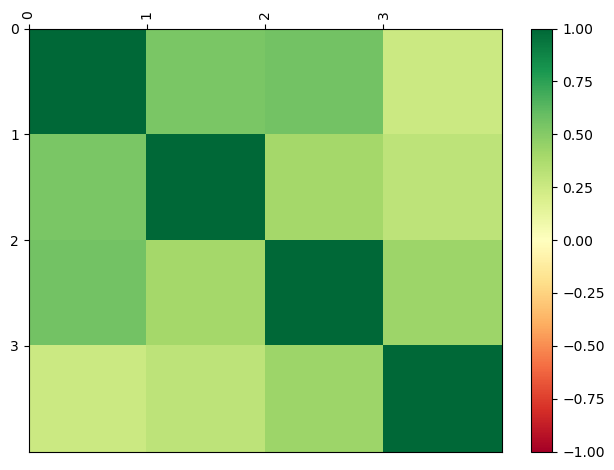

In [5]:
visualize_data(data_selection)


Based on our analysis, we observe several correlations between different variables related to cigarette and marijuana use. Here are the key findings:

There is a notable correlation of 0.54 between individuals who have tried cigarettes and those who have used cigarettes in the past 30 days. This suggests a moderate association between experimentation and recent usage of cigarettes.

Similarly, there is a decent correlation of 0.56 between individuals who have tried cigarettes and those who have tried marijuana. This implies that there is a moderate relationship between initial cigarette use and subsequent marijuana experimentation.

However, when considering chronic usage, the correlation between chronic cigarette users and chronic marijuana users is relatively lower, with a coefficient of only 0.31. This suggests that there might be less overlap between individuals who are habitual users of both cigarettes and marijuana.

Notably, the correlation between trying marijuana and using it regularly is not as high as the correlation observed between the corresponding indicators for cigarette use. Specifically, the correlation coefficient between trying marijuana and being a chronic marijuana user is 0.42, while the correlation between trying cigarettes and being a chronic cigarette user is 0.54. This indicates that the addictive nature of cigarettes might be stronger compared to marijuana.

Based on these findings, it appears unlikely that there is significant overlap between cigarette users and marijuana users. However, there is evidence supporting the idea that trying cigarettes may increase the likelihood of trying marijuana. Additionally, the moderately high correlation coefficient between trying cigarettes and being a chronic cigarette user suggests the presence of an addictive factor in cigarette use, particularly when compared to marijuana.

## Role of Marijuana as an Entry drug
One common argument against recreational marijuana laws is the concern that it may serve as a gateway drug to harder substances. In this analysis, we will delve into this idea by examining the relationship between marijuana use and the use of harder drugs. We will focus on seven variables obtained from the NSDUH study, which include:

MJEVER: Indicates whether marijuana or hashish has ever been used.

1 = Yes
0 = No
MJREC: Indicates the time since the last use of marijuana or hashish.

1 = Within the past 30 days
0 = Other durations*
COCEVER: Indicates whether cocaine has ever been used.

1 = Yes
0 = No
HEREVER: Indicates whether heroin has ever been used.

1 = Yes
0 = No
--HALLUCINOGENS (Hallucinogens class)

LSD: Indicates whether LSD ("acid") has ever been used.

1 = Yes
0 = No
--INHALANTS (Inhalants class)

AMYLNIT: Indicates whether amyl nitrite, "poppers," rush, etc., have ever been inhaled.

1 = Yes
0 = No
--PAIN RELIEVERS (Pain relievers class)

DARVTYLC: Indicates whether Darvocet, Darvon, or Tylenol with codeine has ever been used.

1 = Yes
0 = No
For the variables associated with hallucinogens, inhalants, and pain relievers, we need to extract the number of individuals who have never used each drug. This information is provided separately for each drug class and can be found in the data. Since our focus is on the overall drug classes, we can consider the respective numbers from the first drug type in each class (refer to the data for more detailed information).

*Note: Any duration other than "within the past 30 days" is considered indicative of non-recent usage.
    

In [6]:
data_selection = data[["MJEVER", "MJREC", "COCEVER", "HEREVER", "LSD", "AMYLNIT", "DARVTYLC"]]

# MARIJUANA
data_selection.loc[data_selection['MJEVER'] != 1, 'MJEVER'] = 0
data_selection.loc[data_selection['MJREC'] != 1, 'MJREC'] = 0

# COCAINE
data_selection.loc[data_selection['COCEVER'] != 1, 'COCEVER'] = 0

# HEROIN
data_selection.loc[data_selection['HEREVER'] != 1, 'HEREVER'] = 0

# HALLUCINOGENS
data_selection.loc[data_selection['LSD'] != 91, 'LSD'] = 1
data_selection.loc[data_selection['LSD'] == 91, 'LSD'] = 0

# INHALANTS
data_selection.loc[data_selection['AMYLNIT'] != 91, 'AMYLNIT'] = 1
data_selection.loc[data_selection['AMYLNIT'] == 91, 'AMYLNIT'] = 0

# PAIN RELIEVERS
data_selection.loc[(data_selection["DARVTYLC"] == 91) | (data_selection["DARVTYLC"] == 81), 'DARVTYLC'] = 0
data_selection.loc[(data_selection["DARVTYLC"] != 0), 'DARVTYLC'] = 1

print(data_selection.head())

   MJEVER  MJREC  COCEVER  HEREVER  LSD  AMYLNIT  DARVTYLC
0       0      0        0        0    0        0         0
1       0      0        0        0    0        0         0
2       0      0        0        0    0        0         0
3       1      1        1        0    1        0         0
4       0      0        0        0    0        0         0


            MJEVER     MJREC   COCEVER   HEREVER       LSD   AMYLNIT  DARVTYLC
MJEVER    1.000000  0.422643  0.411049  0.144564  0.438396  0.231772  0.330673
MJREC     0.422643  1.000000  0.281007  0.129407  0.368165  0.187803  0.285053
COCEVER   0.411049  0.281007  1.000000  0.318479  0.574959  0.322684  0.369791
HEREVER   0.144564  0.129407  0.318479  1.000000  0.255902  0.195508  0.213250
LSD       0.438396  0.368165  0.574959  0.255902  1.000000  0.351173  0.397328
AMYLNIT   0.231772  0.187803  0.322684  0.195508  0.351173  1.000000  0.290249
DARVTYLC  0.330673  0.285053  0.369791  0.213250  0.397328  0.290249  1.000000


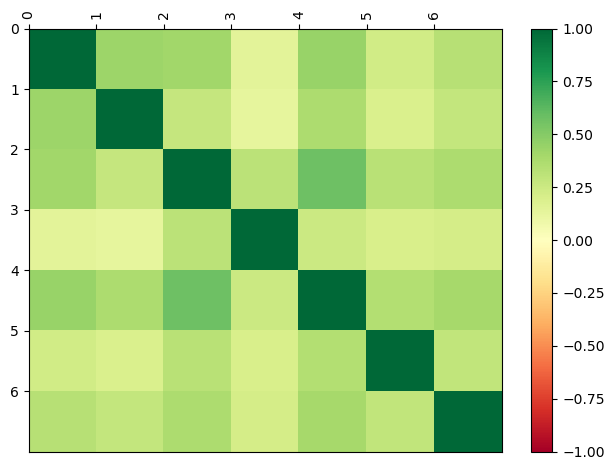

In [7]:
visualize_data(data_selection)

When investigating the relationship between marijuana use and the subsequent use of harder drugs, we can explore some interesting correlations. The National Institute on Drug Abuse (NIDA) has conducted multiple studies(https://www.drugabuse.gov/publications/research-reports/marijuana/marijuana-gateway-drug)  on this topic, as documented in their studies. The NIDA states that the majority of marijuana users do not progress to using other, "harder" substances.

In our analysis, we can observe arguments supporting both sides of this issue within our data. While the correlation coefficients between trying marijuana and trying heroin, inhalants, or prescription painkillers are relatively low (0.14, 0.23, and 0.33, respectively), the coefficients for cocaine and LSD show moderate correlations at 0.41 and 0.43, respectively.

If we consider chronic marijuana users, the correlation coefficients are somewhat reduced but not significantly different. This indicates that, overall, our data aligns with the findings of the NIDA, suggesting that the majority of chronic marijuana users do not progress to using harder drugs. However, exceptions can be seen in the case of LSD and cocaine.

One possible explanation for the higher correlations with LSD and cocaine is that marijuana may produce similar but milder effects compared to LSD, leading users to seek a stronger "psychedelic" experience. As for cocaine, it could be used to counteract the effects of marijuana or to maintain a balanced feeling, potentially explaining the relatively higher correlation.

It's important to note that correlation does not imply causation, and further research is necessary to understand the complex factors involved in drug use progression.

## Exploring the Link Between Prescription Painkiller Usage and Heroin Dependency
Given the ongoing opioid crisis, it is important to examine the connection between non-prescribed prescription painkillers and heroin use. In this analysis, we will focus on investigating the relationship between heroin abuse and the misuse of prescription painkillers.

Variables from the NSDUH study:

HEREVER: Indicates whether heroin has ever been used.

1 = Yes
0 = No
--PAIN RELIEVERS (Pain relievers class)

DARVTYLC: Indicates whether Darvocet, Darvon, or Tylenol with codeine has ever been used non-prescribed.

1 = Yes
0 = No
By analyzing these variables, we aim to gain insights into the relationship between the use of non-prescribed prescription painkillers and heroin abuse.
    

In [8]:
data_selection = data[["HEREVER", "DARVTYLC"]]

# HEROIN
data_selection.loc[data_selection['HEREVER'] != 1, 'HEREVER'] = 0

# PAIN RELIEVERS
data_selection.loc[(data_selection["DARVTYLC"] == 91) | (data_selection["DARVTYLC"] == 81), 'DARVTYLC'] = 0
data_selection.loc[(data_selection["DARVTYLC"] != 0), 'DARVTYLC'] = 1

print(data_selection.head())

   HEREVER  DARVTYLC
0        0         0
1        0         0
2        0         0
3        0         0
4        0         0


          HEREVER  DARVTYLC
HEREVER   1.00000   0.21325
DARVTYLC  0.21325   1.00000


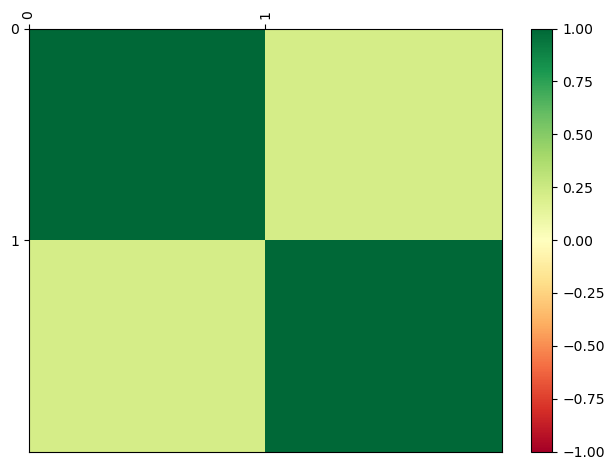

In [9]:
visualize_data(data_selection)

Please note that the data we are analyzing is from 2012, and it is important to consider this context. In examining the relationship between prescription painkiller abuse and heroin use, we find that there is not a significant correlation (correlation coefficient of 0.21) based on this data. It is worth mentioning that OxyContin, a highly potent opioid, was introduced in 1995. However, since our data is from 2012, it captures only the early stages of what has now become a widespread opioid overdose crisis. The current epidemic may have evolved significantly since the time this data was collected.

## Correlation between Early Onset of Substance Use and Subsequent Drug Dependency
An indication of potential later hard drug use could be if an individual started using cigarettes or drugs at a young age. It is possible that the earlier someone starts using substances, the more likely they are to progress to harder drugs in search of stronger effects.

Variables from the NSDUH study:

IRCIGAGE: Imputation-revised age of first use of cigarettes.

991 = Never used
All other values represent different ages
IRMJAGE: Imputation-revised age of first use of marijuana/hashish.

991 = Never used
All other values represent different ages
IRCOCAGE: Imputation-revised age of first use of cocaine.

991 = Never used
All other values represent different ages
COCEVER: Indicates whether cocaine has ever been used.

1 = Yes
0 = No
HEREVER: Indicates whether heroin has ever been used.

1 = Yes
0 = No
--HALLUCINOGENS (Hallucinogens class)

LSD: Indicates whether LSD ("acid") has ever been used.

1 = Yes
0 = No
--INHALANTS (Inhalants class)

AMYLNIT: Indicates whether amyl nitrite, "poppers," rush, etc., have ever been inhaled.

1 = Yes
0 = No
--PAIN RELIEVERS (Pain relievers class)

DARVTYLC: Indicates whether Darvocet, Darvon, or Tylenol with codeine have ever been used.

1 = Yes
0 = No
By examining these variables, we can investigate the relationship between the age of first substance use and the subsequent use of harder drugs.

In [10]:
data_selection = data[["IRCIGAGE", "IRMJAGE", "IRCOCAGE", "COCEVER", "HEREVER", "LSD", "AMYLNIT", "DARVTYLC"]]

ages = data_selection[["IRCIGAGE", "IRMJAGE", "IRCOCAGE"]]
print(ages.describe())
print()
print(ages.apply(pd.Series.value_counts).sort_index())


           IRCIGAGE       IRMJAGE      IRCOCAGE
count  55268.000000  55268.000000  55268.000000
mean     498.886336    598.704078    885.414869
std      487.746581    477.915086    302.311272
min        1.000000      2.000000      1.000000
25%       15.000000     17.000000    991.000000
50%       28.000000    991.000000    991.000000
75%      991.000000    991.000000    991.000000
max      991.000000    991.000000    991.000000

     IRCIGAGE  IRMJAGE  IRCOCAGE
1         7.0      NaN       3.0
2         4.0      1.0       3.0
3        16.0      1.0       1.0
4        22.0      5.0       3.0
5        82.0     13.0       1.0
..        ...      ...       ...
65        NaN      1.0       NaN
67        NaN      1.0       NaN
68        1.0      NaN       NaN
69        NaN      2.0       NaN
991   27387.0  33019.0   49259.0

[64 rows x 3 columns]


In [11]:
import numpy as np
# COCAINE
data_selection.loc[data_selection['COCEVER'] != 1, 'COCEVER'] = 0

# HEROIN
data_selection.loc[data_selection['HEREVER'] != 1, 'HEREVER'] = 0

# HALLUCINOGENS
data_selection.loc[data_selection['LSD'] != 91, 'LSD'] = 1
data_selection.loc[data_selection['LSD'] == 91, 'LSD'] = 0

# INHALANTS
data_selection.loc[data_selection['AMYLNIT'] != 91, 'AMYLNIT'] = 1
data_selection.loc[data_selection['AMYLNIT'] == 91, 'AMYLNIT'] = 0

# PAIN RELIEVERS
data_selection.loc[(data_selection["DARVTYLC"] == 91) | (data_selection["DARVTYLC"] == 81), 'DARVTYLC'] = 0
data_selection.loc[(data_selection["DARVTYLC"] != 0), 'DARVTYLC'] = 1

Since we have a combination of continuous and binary variables in our dataset, the standard Pearson correlation coefficient is not applicable. Instead, pandas uses the Point-Biserial correlation coefficient to measure the strength of association between a continuous-level variable (ratio or interval data) and a binary variable.

Upon examining the correlation coefficients between the age of first substance use and subsequent drug usage, we observe relatively small coefficients for most drugs, except for cocaine. Interestingly, there appears to be an exceptionally strong negative correlation between the age at first cocaine use and cocaine usage. This suggests that as individuals get older, the likelihood of trying cocaine decreases significantly.

However, upon further investigation, we discover that only a small proportion of individuals in the study have ever used cocaine, as indicated by the "991" value for their age. This may explain the unusually large negative correlation coefficient. When we isolate the data to only include cocaine users and their corresponding ages, we observe a significant drop in the correlation coefficient. This highlights the importance of being cautious when interpreting correlations and considering the construction and labeling of our data.

It is crucial to evaluate each set of ages and their effects individually, as this observation regarding the correlation and data construction applies to the age data for other substances as well.

          IRCIGAGE   IRMJAGE  IRCOCAGE   COCEVER   HEREVER       LSD  \
IRCIGAGE  1.000000  0.558225  0.314093 -0.313990 -0.115973 -0.324698   
IRMJAGE   0.558225  1.000000  0.411730 -0.411628 -0.145131 -0.439352   
IRCOCAGE  0.314093  0.411730  1.000000 -0.999799 -0.319101 -0.575546   
COCEVER  -0.313990 -0.411628 -0.999799  1.000000  0.318479  0.574959   
HEREVER  -0.115973 -0.145131 -0.319101  0.318479  1.000000  0.255902   
LSD      -0.324698 -0.439352 -0.575546  0.574959  0.255902  1.000000   
AMYLNIT  -0.177535 -0.232464 -0.323205  0.322684  0.195508  0.351173   
DARVTYLC -0.256342 -0.331628 -0.370311  0.369791  0.213250  0.397328   

           AMYLNIT  DARVTYLC  
IRCIGAGE -0.177535 -0.256342  
IRMJAGE  -0.232464 -0.331628  
IRCOCAGE -0.323205 -0.370311  
COCEVER   0.322684  0.369791  
HEREVER   0.195508  0.213250  
LSD       0.351173  0.397328  
AMYLNIT   1.000000  0.290249  
DARVTYLC  0.290249  1.000000  


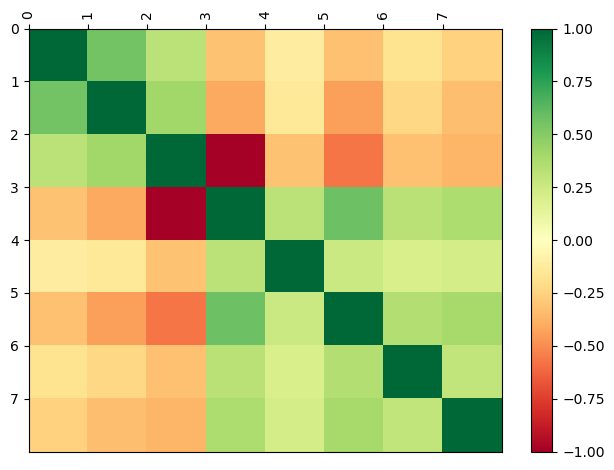

In [12]:
visualize_data(data_selection)

Now, we will analyze beginning cigarette usage and hard drug use.

In [13]:
def age_graph_dist(data, drug_age_str):
    desc = data.describe()
    x = np.linspace(desc[drug_age_str]["min"], desc[drug_age_str]["max"], num=50)
    
    median = data[drug_age_str].median()
    mu = desc[drug_age_str]["mean"]
    sigma = desc[drug_age_str]["std"]
    kertosis = data.kurtosis()[drug_age_str]
    y = stats.norm.pdf(x, mu, sigma)
    
    fig = plt.figure(figsize=(8, 5))
    grid = (10, 1)
    
    ax1 = plt.subplot2grid(grid, (0,0), rowspan=4, colspan=1)
    ax1.plot(x, y, 'r--')
    ax1.text(35, 0.075, 'mean: {}'.format(round(mu, 4)))
    ax1.text(35, 0.060, 'std: {}'.format(round(sigma, 4)))
    ax1.text(35, 0.045, 'kertosis: {}'.format(round(kertosis, 4)))
    
    ax2 = plt.subplot2grid(grid, (4,0), rowspan=4, colspan=1, sharex=ax1)
    ax2.hist(data[drug_age_str].values, 10)
    
    ax3 = plt.subplot2grid(grid, (8,0), rowspan=2, colspan=1, sharex=ax1)
    data.boxplot(drug_age_str, ax=ax3, vert=False)
    ax3.text(0, 0.6, 'median: {}'.format(round(median, 4)))
    plt.tight_layout()
    fig.subplots_adjust(hspace=4.5)
    plt.show()

#### Cigarette
We can see below that the mean age of first cigarette use in about 15.5 years old, well below the age of 18 to buy cigarettes,
but we can also see the kertosis is 8.44, which indicates that this is not a normal distribution and that a five number
summary would be a better indicate the spread. We can see on the box plot that the median age is 15 
as well, indicating that the average age of first cigarette use is rather low. 
The age of first trying cigarettes is weakly negatively correlated with eventual hard drug use.
This data shows that the older you are, the less likely you are to try any hard drug, but not substantially less likely
with each additional year of age. The only notable value is the negative correlation with ever abusing prescription
pain killers. This could be due to somewhat similar but milder effects in using cigarettes which are plentiful,
so no need to try and branch into pain killers.

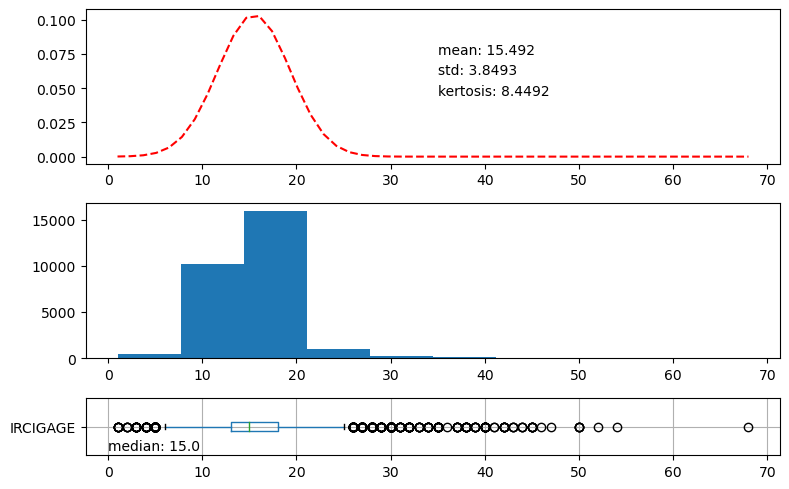

          IRCIGAGE   COCEVER   HEREVER       LSD   AMYLNIT  DARVTYLC
IRCIGAGE  1.000000 -0.133184 -0.097614 -0.144238 -0.157687 -0.140910
COCEVER  -0.133184  1.000000  0.304264  0.547300  0.321687  0.356510
HEREVER  -0.097614  0.304264  1.000000  0.242831  0.202882  0.215645
LSD      -0.144238  0.547300  0.242831  1.000000  0.346085  0.386325
AMYLNIT  -0.157687  0.321687  0.202882  0.346085  1.000000  0.287808
DARVTYLC -0.140910  0.356510  0.215645  0.386325  0.287808  1.000000


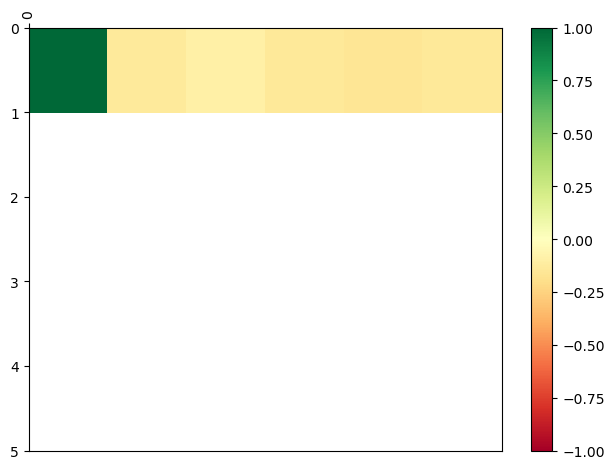

In [14]:
from scipy import stats
# remove people who have never tried anything
rows_to_delete = data_selection[(data_selection["IRCIGAGE"] == 991) & 
                                (data_selection["IRMJAGE" ] == 991) &
                                (data_selection["IRCOCAGE"] == 991) ].index
data_selection.drop(rows_to_delete , inplace=True)

cig_age_data = data_selection[data_selection['IRCIGAGE'] != 991]
cig_age_data.drop(["IRMJAGE", "IRCOCAGE"] , inplace=True, axis=1)

age_graph_dist(cig_age_data, "IRCIGAGE")
visualize_data(cig_age_data, [0])

#### Marijuana
We can see that the mean age of first marijuana use is 16.5 and the kertosis is 17.6, indicating that this also is not a normal
the distribution is not normal. We can see from the 5 box plot that the median slightly lower than the mean at 16 years old, and
that there is a large portion of people in the younger age brackets, while the mean indicates an upward skew, and looking at
the box plot, we can see that there are a lot of outliers at the higher ages.
Looking at the starting age of marijuana use, we can see that again, the relationships are weakly negative with age across
the board. LSD is the most negative at -0.21, showing that as age goes up, the tendency to try LSD goes down. While this is
a weak finding, it is plausible that the older someone is at the start of trying marijuana, the less likely they are to
need a stronger drug as they don't have as much time to build up a tolerance.

(9129, 8)
(22249, 8)


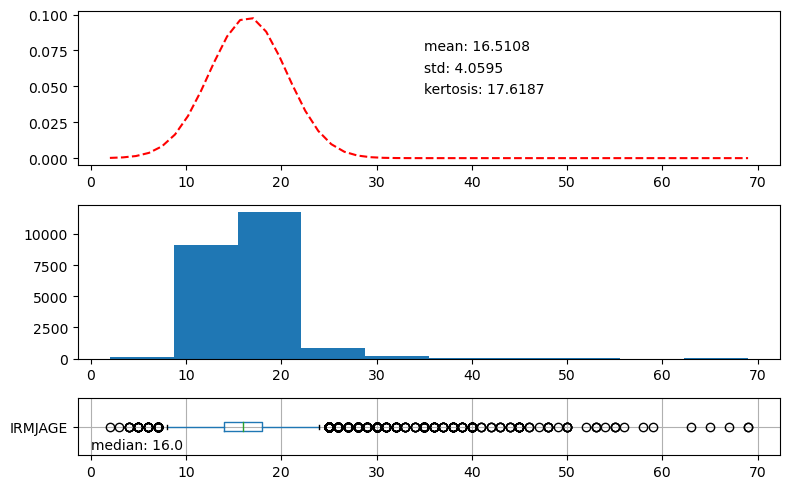

           IRMJAGE   COCEVER   HEREVER       LSD   AMYLNIT  DARVTYLC
IRMJAGE   1.000000 -0.166748 -0.122773 -0.213517 -0.164184 -0.190010
COCEVER  -0.166748  1.000000  0.291925  0.503942  0.297608  0.322436
HEREVER  -0.122773  0.291925  1.000000  0.224179  0.192636  0.208785
LSD      -0.213517  0.503942  0.224179  1.000000  0.320252  0.346951
AMYLNIT  -0.164184  0.297608  0.192636  0.320252  1.000000  0.268607
DARVTYLC -0.190010  0.322436  0.208785  0.346951  0.268607  1.000000


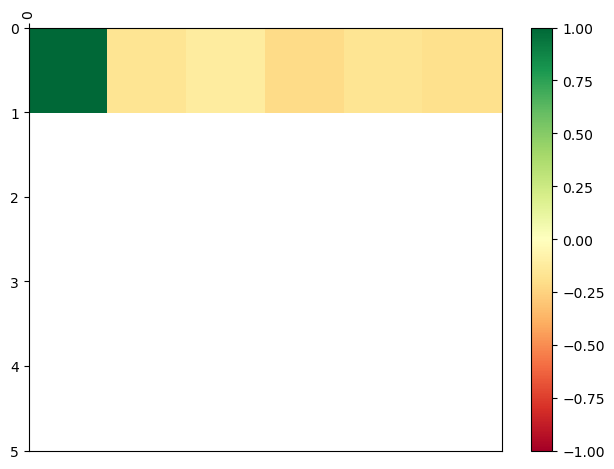

In [15]:
print(data_selection[data_selection['IRMJAGE'] == 991].shape)
print(data_selection[data_selection['IRMJAGE'] != 991].shape)
coc_age_data = data_selection[data_selection['IRMJAGE'] != 991]
coc_age_data.drop(["IRCOCAGE", "IRCIGAGE"] , inplace=True, axis=1)

age_graph_dist(coc_age_data, "IRMJAGE")
visualize_data(coc_age_data, [0])

#### Cocaine
We can see that the mean for the age of first cocaine use is 19.88, the oldest age so far. Our kertosis is 6.2, which again,
shows this is not a normal distribution, but our median is slightly lower than our mean, at 19 years old.
Finally we look at the relationship between starting age of cocaine use and hard drug use, we can see that, unsurprisingly,
there is a positive relationship between the age of trying cocaine and having ever tried cocaine. Across the rest of the
board, the results are similar to the starting age of cigarette use, with a notably lower correlation coefficient in
prescription pain killer abuse.

(25369, 8)
(6009, 8)


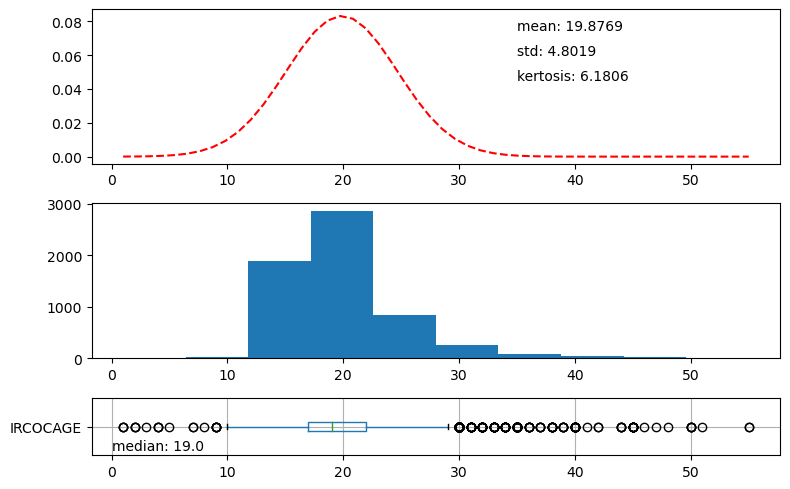

          IRCOCAGE   COCEVER   HEREVER       LSD   AMYLNIT  DARVTYLC
IRCOCAGE  1.000000  0.001432 -0.145659 -0.165516 -0.135938 -0.201559
COCEVER   0.001432  1.000000  0.006912 -0.012023 -0.006028  0.001803
HEREVER  -0.145659  0.006912  1.000000  0.145700  0.166410  0.202859
LSD      -0.165516 -0.012023  0.145700  1.000000  0.271761  0.254029
AMYLNIT  -0.135938 -0.006028  0.166410  0.271761  1.000000  0.236419
DARVTYLC -0.201559  0.001803  0.202859  0.254029  0.236419  1.000000


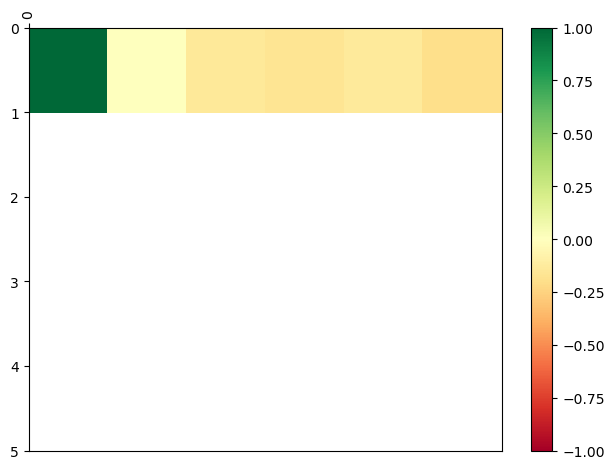

In [16]:
print(data_selection[data_selection['IRCOCAGE'] == 991].shape)
print(data_selection[data_selection['IRCOCAGE'] != 991].shape)
coc_age_data = data_selection[data_selection['IRCOCAGE'] != 991]
coc_age_data.drop(["IRMJAGE", "IRCIGAGE"] , inplace=True, axis=1)

age_graph_dist(coc_age_data, "IRCOCAGE")
visualize_data(coc_age_data, [0])

## Conclusion
In summary, our analysis revealed several key findings based on the data:

There is evidence in our data supporting the addictive nature of cigarettes, as indicated by a moderately high correlation coefficient between trying cigarettes and being a chronic user. This suggests that once individuals try cigarettes, they are more likely to become habitual smokers.

We did not find significant overlap between cigarette users and marijuana users. However, there is an indication that trying cigarettes may lead to trying marijuana, implying a potential gateway effect.

The majority of chronic marijuana users in our data did not progress to harder drugs, aligning with previous research. However, exceptions were observed with LSD and cocaine, which showed moderate correlations. We explored some possible explanations for these correlations, such as the desire for a stronger psychedelic experience or using cocaine to counteract marijuana's effects.

Surprisingly, we found a weak correlation (0.21) between prescription painkiller abuse and heroin use. This may be attributed to the timeframe of the data collection, which predates the escalation of the opioid epidemic. It is important to consider that the relationship between painkiller abuse and heroin use may have evolved over time.

The age at which individuals start using a particular drug showed relatively small correlations with later attempts at harder drugs. The correlations for starting age of cigarette use, marijuana use, and cocaine use were similar, suggesting a comparable influence on subsequent drug experimentation.

These findings provide insights into the relationships between different drugs and shed light on the potential influences on drug use patterns. However, it is essential to interpret these correlations cautiously and consider the limitations of the data and the evolving nature of substance abuse trends.